## Import Necessary Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load Dataset

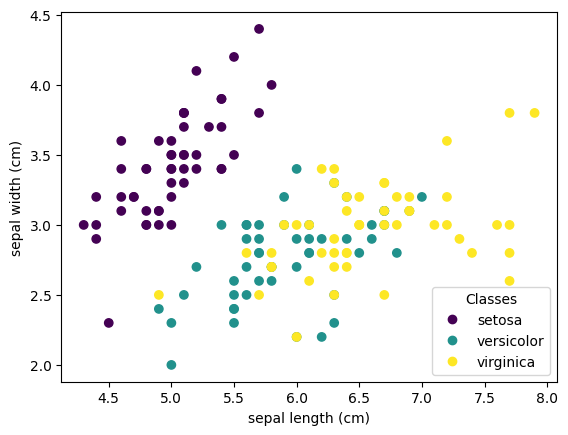

In [ ]:
from sklearn.datasets import load_iris
from sklearn import datasets

iris = datasets.load_iris()
# iris = load_iris(as_frame=True)

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
# Create a DataFrame from the features and target
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Split Dataset

In [ ]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## Normalize Dataset

In [ ]:
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std

N_train = X_train_scaled.shape[0]

## Set targets and Perform sns plot

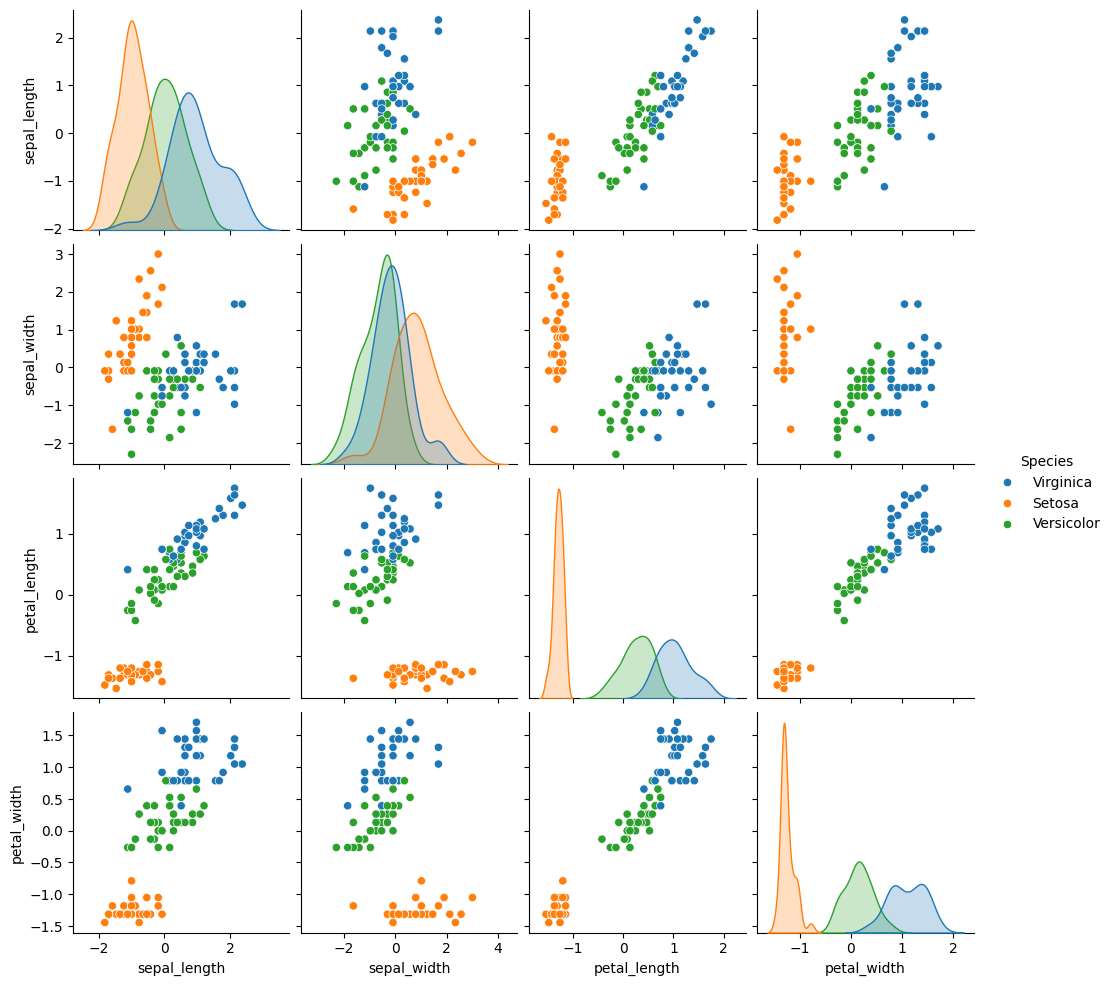

In [ ]:
df = pd.DataFrame(np.hstack((X_train_scaled, y_train.reshape(-1,1))),
                  columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','Species'])
target_names = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
df["Species"] = df["Species"].map(target_names)
sns.pairplot(df, hue="Species", palette=["C0", "C1", "C2"])
plt.show()

# Eigenvalue Decomposition (EVD)

## Compute Covariance Matrix for Eigenvalue Decomposition

In [ ]:
# Compute the covariance matrix
C = np.dot(X_train_scaled.T, X_train_scaled) / N_train
print("Covariance Matrix:")
print(C)

Covariance Matrix:
[[ 1.         -0.07508407  0.8748601   0.81678983]
 [-0.07508407  1.         -0.40548769 -0.35556639]
 [ 0.8748601  -0.40548769  1.          0.96304528]
 [ 0.81678983 -0.35556639  0.96304528  1.        ]]


## Perform Eigenvalue Decomposition

In [ ]:
eigvals, eigvecs = np.linalg.eig(C)
print("Eigenvectors (each column):")
print(eigvecs)
print("Eigenvalues (each element):")
print(eigvals)

Eigenvectors (each column):
[[ 0.523215   -0.38039416 -0.70557265  0.28933299]
 [-0.25169956 -0.92371023  0.25874261 -0.12829262]
 [ 0.58317039 -0.01602484  0.11116789 -0.80454783]
 [ 0.56815992 -0.04246043  0.65027779  0.50252385]]
Eigenvalues (each element):
[2.89818405 0.94570059 0.13691497 0.01920039]


## Cumulative Percent Variance of EVD

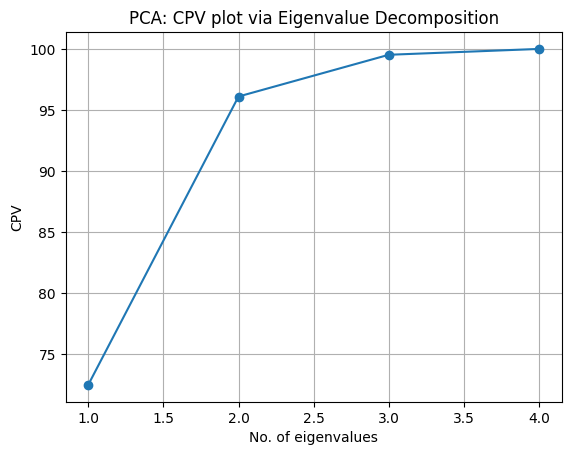

In [ ]:
cpv = np.cumsum(eigvals) / np.sum(eigvals) * 100
plt.plot(range(1,len(eigvals)+1),cpv,'o-')
plt.title('PCA: CPV plot via Eigenvalue Decomposition')
plt.xlabel('No. of eigenvalues')
plt.ylabel('CPV')
plt.grid()
plt.show()

## Acquire the needed PCs and Plot

In [ ]:
# Project only using the first 2 principal components (eigenvectors)
train_scores = X_train_scaled @ eigvecs[:,:2]
test_scores = X_test_scaled @ eigvecs[:,:2]

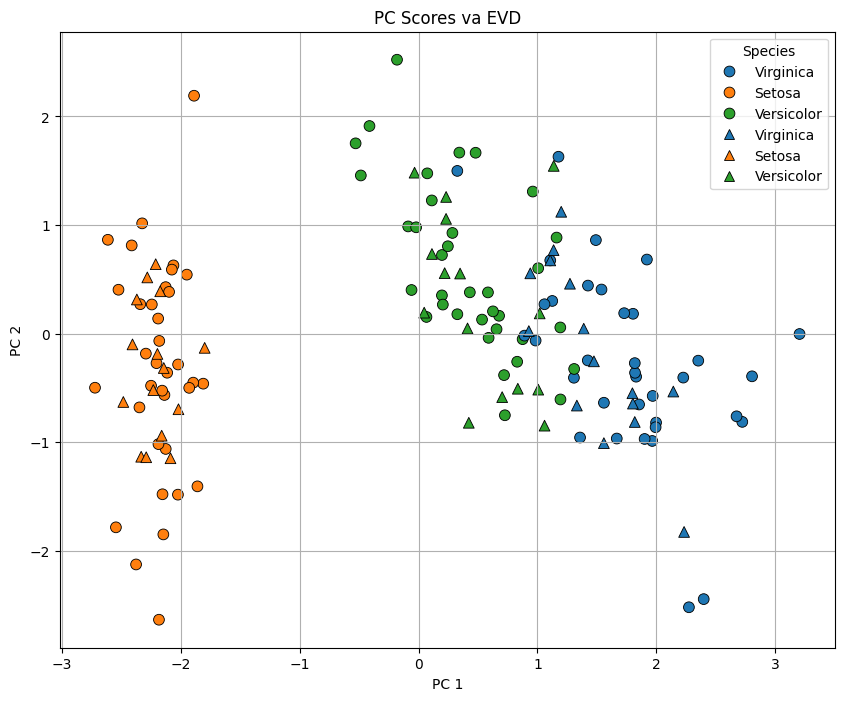

In [ ]:
# Visualize the PC scores
pca_train = pd.DataFrame(np.hstack((train_scores, y_train.reshape(-1,1))),
                         columns=['PC 1', 'PC 2', 'Species'])
pca_test = pd.DataFrame(np.hstack((test_scores, y_test.reshape(-1,1))),
                        columns=['PC 1', 'PC 2', 'Species'])

pca_train["Species"] = pca_train["Species"].map(target_names)
pca_test["Species"] = pca_test["Species"].map(target_names)

plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_train, x="PC 1", y="PC 2", s=60, edgecolor='k', marker='o', hue='Species')
sns.scatterplot(data=pca_test, x="PC 1", y="PC 2", s=60, edgecolor='k', marker='^', hue='Species')
plt.title("PC Scores va EVD")
plt.grid()
plt.show()

# Singular Value Decomposition

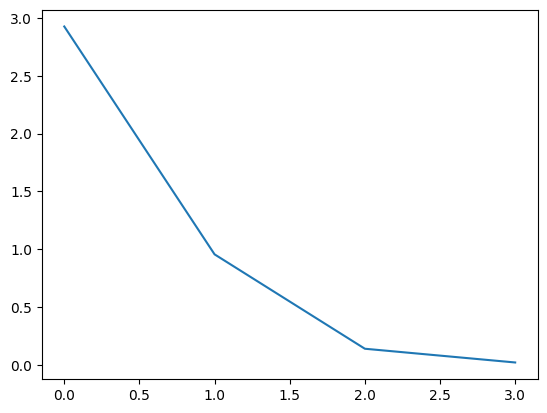

In [ ]:
##This time we perform SVD

U, S, Vh = np.linalg.svd(X_train_scaled, full_matrices=False)

PC = Vh.T
eigenvals = (1/(N_train-1))*S**2

plt.plot(eigenvals)
plt.show()

In [ ]:
# compute explained variance
expvar = eigenvals/ np.sum(eigenvals)

# print(eigenvals)
# print(eigvals)

# print(eigvecs)
# print("====" * 1000)
# print(PC)

## Cumulative Percent Variance of SVD

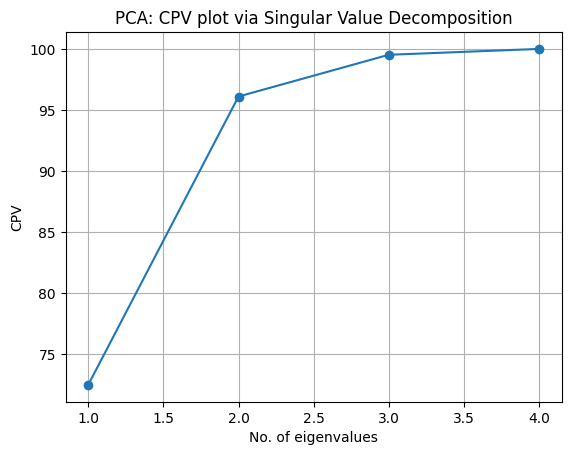

In [ ]:
cpv_svd = np.cumsum(eigenvals) / np.sum(eigenvals) * 100
plt.plot(range(1,len(eigenvals)+1),cpv_svd,'o-')
plt.title('PCA: CPV plot via Singular Value Decomposition')
plt.xlabel('No. of eigenvalues')
plt.ylabel('CPV')
plt.grid()
plt.show()

In [ ]:
# Project only using the first 2 principal components (eigenvectors)
train_scores_svd = X_train_scaled @ -PC[:,:2]
# train_scores_svd = U @ np.diag(S)
test_scores_svd = X_test_scaled @ -PC[:,:2]

# print(eigvecs[:,:2])
# print("===" * 100)
# print(-PC[:,:2])
# eigvecs[:,:2] == -PC[:,:2]

In [ ]:
T = U @ np.diag(S)

# -PC[:,:2]
print(eigvecs)
print("---"*100)
print(Vh.T)


[[ 0.523215   -0.38039416 -0.70557265  0.28933299]
 [-0.25169956 -0.92371023  0.25874261 -0.12829262]
 [ 0.58317039 -0.01602484  0.11116789 -0.80454783]
 [ 0.56815992 -0.04246043  0.65027779  0.50252385]]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[-0.523215    0.38039416 -0.70557265 -0.28933299]
 [ 0.25169956  0.92371023  0.25874261  0.12829262]
 [-0.58317039  0.01602484  0.11116789  0.80454783]
 [-0.56815992  0.04246043  0.65027779 -0.50252385]]


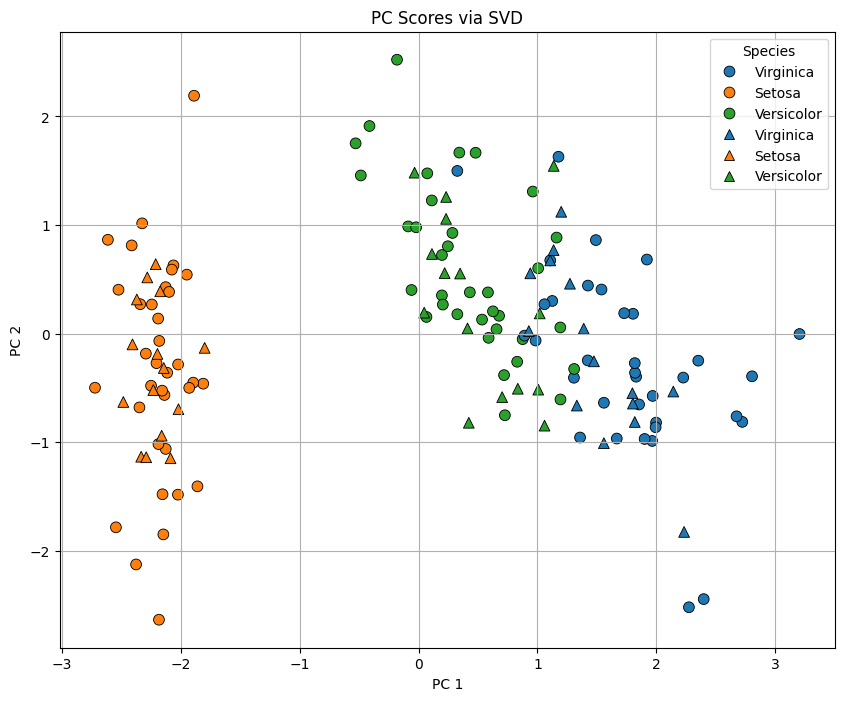

In [ ]:
# Visualize the PC scores of SVD
pca_train_svd = pd.DataFrame(np.hstack((train_scores_svd, y_train.reshape(-1,1))),
                         columns=['PC 1', 'PC 2', 'Species'])
pca_test_svd = pd.DataFrame(np.hstack((test_scores_svd, y_test.reshape(-1,1))),
                        columns=['PC 1', 'PC 2', 'Species'])

pca_train_svd["Species"] = pca_train_svd["Species"].map(target_names)
pca_test_svd["Species"] = pca_test_svd["Species"].map(target_names)

plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_train_svd, x="PC 1", y="PC 2", s=60, edgecolor='k', marker='o', hue='Species')
sns.scatterplot(data=pca_test_svd, x="PC 1", y="PC 2", s=60, edgecolor='k', marker='^', hue='Species')
plt.title("PC Scores via SVD")
plt.grid()
plt.show()

In [ ]:
A = np.array([[1,1],[0,1],[1,0]])
vals, vecs = np.linalg.eig(A.T @ A)

S, V, D = np.linalg.svd(A, full_matrices=False)

# vecs @ np.diag(vals) @ vecs.T

# vecs

-D.T


array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])